# Análisis

Este documento explora correlaciones entre los componentes de pilares de iEcosystems, tales como 

* I-Funding
* E-Funding
* Comparative Advantage
* Impact

Así como sus relaciones con métricas globales de los ecosistemas, como aquellas métricas que describen la 

* estabilidad
* robustez
* propensión al colapso



In [1]:
#Paquetes que utilizaremos

import numpy as np 
import pandas as pd 
import matplotlib as plt

import scipy.stats as stats

In [2]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.1:
        return (True,r[0])
    else:
        return (False,0)
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.1:
        print(f'Correlation between:  ' + a + '   and   ' + b)
        print('**********************************************')
        print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
        print('*Statistically significant*')
        print('***********************************************')

## Carga de Datos

En la siguiente viñeta conseguimos los siguientes DataFrames, con base en los cuales vamos a realizar nustro análisis.

In [3]:
ieco_grf_df = pd.read_csv('Kevin/iEco_&_graph.csv')

ieco_df = pd.read_csv('Kevin/iEco.csv')
ieco_df_copy = pd.read_csv('Kevin/iEco(copy).csv')

grf_df = pd.read_csv('Tidy_DataFrame.csv')

grf_sin_islas_nd = pd.read_csv('Gephi_sin_islas/CABA sin islas nodes.csv')
full_ieco_df = pd.read_csv('Kevin/full_iEco.csv')

ieco_grf_df = pd.concat([ieco_grf_df,grf_df],axis=1)
ieco_grf_df = ieco_grf_df.loc[:,~ieco_grf_df.columns.duplicated()]
full_ieco_df = full_ieco_df.rename({0:1,1:0,5:3,3:5},axis='index')
full_ieco_grf_df = pd.concat([full_ieco_df,grf_df],axis=1)


In [4]:
#DataFrame en el cual se muestra, por capital, el valor de cada uno de los pilares de iEcosystems.
ieco_df

Unnamed: 0  1 Foundational Institutions  2.01 I-Human Capital  \
0           1                        3.522              2.278000   
1           0                        3.169              2.034667   
2           2                        3.913              2.580667   
3           5                        3.177              1.828000   
4           4                        3.929              2.992000   
5           3                        3.780              2.171333   

   2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
0          1.5600                 3.3175       3.110000   
1          1.7400                 3.3100       2.716667   
2          1.2025                 3.6925       2.960000   
3          1.8400                 3.2650       2.876667   
4          1.9500                 3.9525       3.076667   
5          1.5025                 3.6150       2.570000   

   2.05 I-Culture & Incentives  3.01 E-Human Capital  3.02 E-Funding  \
0                        2.515                 3.115        2.300000   
1                        1.795                 3.075        1.723333   
2                        1.955                 4.155        2.206667   
3                        2.755                 2.975        1.991667   
4                        3.830                 3.190        2.423333   
5                        1.245                 3.045        2.005000   

   3.03 E-Infrastructure  3.04 E-Demand  3.05 E-Culture & Incentives  \
0                 3.6275          3.430                     3.233333   
1                 3.7125          3.175                     2.611667   
2                 3.9975          3.205                     4.121667   
3                 3.6775          3.460                     3.228333   
4                 4.2925          3.365                     2.910000   
5                 3.9050          2.740                     2.613333   

   4 Comparative Advantage  5 Impact  
0                     2.93  1.985455  
1                     2.58  2.094545  
2                     3.11  2.375455  
3                     2.74  2.088182  
4                     2.84  2.270000  
5                     2.48  2.257879

In [5]:
#DataFrame en el cual se muestra, por capital, el valor de cada uno de los pilares de iEcosystems.
# Copia del DataFrame antetior, solo que 
# Mexico->1, 
# Arg->0, 
# Chile ->2, 
# Bra->5, 
# España->4, 
# Uruguay-3

ieco_df_copy

Unnamed: 0  1 Foundational Institutions  2.01 I-Human Capital  \
0     México                        3.522              2.278000   
1  Argentina                        3.169              2.034667   
2      Chile                        3.913              2.580667   
3     Brasil                        3.177              1.828000   
4     España                        3.929              2.992000   
5    Uruguay                        3.780              2.171333   

   2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
0          1.5600                 3.3175       3.110000   
1          1.7400                 3.3100       2.716667   
2          1.2025                 3.6925       2.960000   
3          1.8400                 3.2650       2.876667   
4          1.9500                 3.9525       3.076667   
5          1.5025                 3.6150       2.570000   

   2.05 I-Culture & Incentives  3.01 E-Human Capital  3.02 E-Funding  \
0                        2.515                 3.115        2.300000   
1                        1.795                 3.075        1.723333   
2                        1.955                 4.155        2.206667   
3                        2.755                 2.975        1.991667   
4                        3.830                 3.190        2.423333   
5                        1.245                 3.045        2.005000   

   3.03 E-Infrastructure  3.04 E-Demand  3.05 E-Culture & Incentives  \
0                 3.6275          3.430                     3.233333   
1                 3.7125          3.175                     2.611667   
2                 3.9975          3.205                     4.121667   
3                 3.6775          3.460                     3.228333   
4                 4.2925          3.365                     2.910000   
5                 3.9050          2.740                     2.613333   

   4 Comparative Advantage  5 Impact  
0                     2.93  1.985455  
1                     2.58  2.094545  
2                     3.11  2.375455  
3                     2.74  2.088182  
4                     2.84  2.270000  
5                     2.48  2.257879

In [6]:
#DataFrame en el cual se muestra, por capital, el valor de una colección
#de métricas globales observadas en nuestros ecosistemas

grf_df

Ciudad       País  avg strength    weight    Degree  \
0               CABA  Argentina      3.244633  1.481579  4.385965   
1               CDMX     México      3.477388  1.388629  3.658863   
2  Santiago de Chile      Chile      3.417211  1.462564  3.948718   
3         Montevideo    Uruguay      3.227742  2.749495  7.747475   
4             Madrid     España      3.518387  1.362343  3.790795   
5          Sao Paulo     Brasil      3.430669  1.253704  3.370370   

   Weighted Degree  Eccentricidad  Clustering  Diámetro  Radio  \
0        14.017544       4.798246    0.148791         6      3   
1        12.963211       5.622074    0.075940         7      4   
2        13.764103       5.041026    0.134037         6      3   
3        25.939394       4.479798    0.207747         6      3   
4        12.861925       6.079498    0.120510         8      5   
5        11.694444       6.726852    0.129928         8      4   

   Camino más corto promedio  Transitividad  Eficiencia Global  \
0                   3.355669       0.107392           0.325773   
1                   3.820318       0.050000           0.289320   
2                   3.227544       0.100744           0.338889   
3                   3.081116       0.224523           0.360837   
4                   3.783517       0.081917           0.294653   
5                   4.324031       0.078571           0.266719   

   Small Worldness  Rich Club Coefficient  Core Ratio  \
0         0.960807               5.333333    0.495614   
1         0.677149               1.000000    0.421405   
2         0.906814              19.000000    0.430769   
3         1.274519              59.000000    0.565657   
4         1.141033              14.000000    0.439331   
5         1.211794               1.000000    0.421296   

   Central Point Dominance  Spectral radius  
0                    0.251            1.868  
1                    0.202            1.910  
2                    0.525            1.890  
3                    0.179            1.778  
4                    0.184            1.920  
5                    0.237            1.983

In [7]:
#DataFrame en el cual se muestra, por capital, el valor de 
# las métricas de iEcosystems junto con las métricas
# globales observadas en nuestros ecosistemas.

ieco_grf_df

Unnamed: 0  1 Foundational Institutions  2.01 I-Human Capital  \
0           0                        3.169              2.034667   
1           1                        3.522              2.278000   
2           2                        3.913              2.580667   
3           3                        3.780              2.171333   
4           4                        3.929              2.992000   
5           5                        3.177              1.828000   

   2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
0          1.7400                 3.3100       2.716667   
1          1.5600                 3.3175       3.110000   
2          1.2025                 3.6925       2.960000   
3          1.5025                 3.6150       2.570000   
4          1.9500                 3.9525       3.076667   
5          1.8400                 3.2650       2.876667   

   2.05 I-Culture & Incentives  3.01 E-Human Capital  3.02 E-Funding  \
0                        1.795                 3.075        1.723333   
1                        2.515                 3.115        2.300000   
2                        1.955                 4.155        2.206667   
3                        1.245                 3.045        2.005000   
4                        3.830                 3.190        2.423333   
5                        2.755                 2.975        1.991667   

   3.03 E-Infrastructure  ...  Diámetro  Radio  Camino más corto promedio  \
0                 3.7125  ...         6      3                   3.355669   
1                 3.6275  ...         7      4                   3.820318   
2                 3.9975  ...         6      3                   3.227544   
3                 3.9050  ...         6      3                   3.081116   
4                 4.2925  ...         8      5                   3.783517   
5                 3.6775  ...         8      4                   4.324031   

   Transitividad Eficiencia Global Small Worldness  Core Ratio  \
0       0.107392          0.325773        0.960807    0.495614   
1       0.050000          0.289320        0.677149    0.421405   
2       0.100744          0.338889        0.906814    0.430769   
3       0.224523          0.360837        1.274519    0.565657   
4       0.081917          0.294653        1.141033    0.439331   
5       0.078571          0.266719        1.211794    0.421296   

   Rich Club Coefficient  Central Point Dominance  Spectral radius  
0               5.333333                    0.251            1.868  
1               1.000000                    0.202            1.910  
2              19.000000                    0.525            1.890  
3              59.000000                    0.179            1.778  
4              14.000000                    0.184            1.920  
5               1.000000                    0.237            1.983  

[6 rows x 38 columns]

In [8]:
#DataFrame en el cual se muestra, por capital, el valor de 
# las métricas de iEcosystems desglosadas en sus componentes.

full_ieco_df

Unnamed: 0  1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
1     México                              3.90                           4.44   
0  Argentina                              3.36                           4.22   
2      Chile                              3.90                           4.66   
5     Brasil                              3.36                           4.25   
4     España                              4.12                           4.48   
3    Uruguay                              3.46                           4.58   

   1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
1                    3.63                            3.81   
0                    2.97                            2.60   
2                    4.01                            3.40   
5                    2.38                            3.02   
4                    4.39                            4.17   
3                    3.81                            3.14   

   1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
1                           3.68                        3.33   
0                           3.30                        3.02   
2                           3.59                        3.80   
5                           3.56                        3.29   
4                           3.84                        4.00   
3                           3.25                        3.88   

   1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
1                             2.47                      3.34   
0                             2.99                      2.86   
2                             3.94                      3.59   
5                             2.82                      2.98   
4                             3.20                      3.31   
3                             3.94                      3.84   

   1.09 Trade freedom (IEF)  ...  5.02 Social Progress Index  \
1                      4.50  ...                        3.82   
0                      3.77  ...                        4.07   
2                      4.56  ...                        4.20   
5                      3.71  ...                        3.91   
4                      4.46  ...                        4.50   
3                      4.10  ...                        4.11   

   5.03 Inclusive Development Index  \
1                              3.08   
0                              3.09   
2                              3.29   
5                              2.95   
4                              3.27   
3                              3.31   

   5.04 Population below international poverty line (SDG 1 - No poverty)  \
1                                               4.80                       
0                                               4.97                       
2                                               4.94                       
5                                               4.61                       
4                                               4.92                       
3                                               4.99                       

   5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)  \
1                                               4.88           
0                                               4.88           
2                                               4.93           
5                                               5.00           
4                                               5.00           
3                                               5.00           

   5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)  \
1                                               3.34                                          
0                                               3.58                                          
2                                               3.32                                          
5                      

In [9]:
#------------------
# Exploración 1
#------------------

list1=list(ieco_df.keys())     #Pilares de iEcosystems
list2=list(grf_df.keys())      #Nombres de métricas globales

list1.remove('Unnamed: 0')     #Removemos columnas que no denotan valores numéricos
list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:             #por cada métrica de iEco y global del grafo, revisamos si hay corr. significativa
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))                             #si correlación significativa y >0
            else:
                negative_pairs.append((key1,key2))                             #si correlación significativa y <=0

In [10]:
#El texto impreso es una lista de correlaciones significativas y positivas que encontramos (+)

for keys in positive_pairs:
    print('')
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])
    print('')
    


Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
*Statistically significant*
***********************************************


Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.952116314101418, p-value: 0.00338437607108655
*Statistically significant*
***********************************************


Correlation between:  2.05 I-Culture & Incentives   and   avg strength
**********************************************
Pearson Correlation: 0.857666917638727, p-value: 0.028946317443073532
*Statistically significant*
***********************************************


Correlation between:  2.05 I-Culture & Incentives   and   Eccentricidad
**********************************************
Pearson Correlation: 0.8042285278880069, p-value: 0.05373808928218256
*Statistically significant*
****************

In [11]:
#El texto impreso es una lista de correlaciones significativas y negativas que encontramos (-)

for keys in negative_pairs:
    print('')
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])
    print('')
    


Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
*Statistically significant*
***********************************************


Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599853, p-value: 0.059818901855709296
*Statistically significant*
***********************************************


Correlation between:  2.04 I-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.7540324234088824, p-value: 0.0833095479157745
*Statistically significant*
***********************************************


Correlation between:  2.04 I-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.9174944429171862, p-value: 0.00992993587365419
*Statistically significant*
***********************************************


In [12]:
#------------------
# Exploración 2
#------------------

#list1=list(full_ieco_df.keys())
list1=['2.04a Government procurement of advanced technology (GCI)',
       '2.04b University-industry research collaborations (GII)',
       '2.04c Trade, Competition & Market scale (GII)',
       '3.04a Buyer sophistication (GCI 4.0)',
       '3.04b Domestic Market Scale (GII)']                           #lista: componentes de I-Demand
list2=list(grf_df.keys())                                             #lista: métricas globales

list2.remove('Ciudad')   #removemos columnas con valores que no son numéricos
list2.remove('País')

positive_pairs_2=[]
negative_pairs_2=[]

for key1 in list1:                     #por cada componente de IDemand, métrica global revisamos corr. significativa
    for key2 in list2:                 
        sig,corr = significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig == True:
            if corr > 0:
                positive_pairs_2.append((key1,key2))        #correlación significativa positiva
            else:
                negative_pairs_2.append((key1,key2))        #correlación significativa negativa

In [13]:
#El texto impreso es una lista de correlaciones significativas y positivas que encontramos (+)

for keys in positive_pairs_2:
    print('')
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])
    print('')
    


Correlation between:  2.04b University-industry research collaborations (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9057240787070973, p-value: 0.012912964197428016
*Statistically significant*
***********************************************


Correlation between:  2.04b University-industry research collaborations (GII)   and   Spectral radius
**********************************************
Pearson Correlation: 0.7928267560324674, p-value: 0.059935113706115976
*Statistically significant*
***********************************************


Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9567036039358547, p-value: 0.0027712856343463715
*Statistically significant*
***********************************************


Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   Spectral radius
****************************

In [14]:
#El texto impreso es una lista de correlaciones significativas y negativas que encontramos (-)

for keys in negative_pairs_2:
    print('')
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])
    print('')
    


Correlation between:  2.04b University-industry research collaborations (GII)   and   weight
**********************************************
Pearson Correlation: -0.8026827654539166, p-value: 0.05455995298570256
*Statistically significant*
***********************************************


Correlation between:  2.04b University-industry research collaborations (GII)   and   Degree
**********************************************
Pearson Correlation: -0.8537047923796843, p-value: 0.03053790559238056
*Statistically significant*
***********************************************


Correlation between:  2.04b University-industry research collaborations (GII)   and   Weighted Degree
**********************************************
Pearson Correlation: -0.8072291739267887, p-value: 0.05215914812809964
*Statistically significant*
***********************************************


Correlation between:  2.04b University-industry research collaborations (GII)   and   Clustering
**************************

In [15]:
#------------------
# Exploración 3
#------------------

list1=list(full_ieco_df.keys())[-9:]                #lista de componentes del indicador Impacto
list2=list(grf_df.keys())                           #lista de métricas globales

list2.remove('Ciudad')    #removemos parámetros con valores no numéricos
list2.remove('País')

positive_pairs_3=[]
negative_pairs_3=[]

for key1 in list1:                                  #revisamos en cada pareja si hay corr. significativa + o -
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_3.append((key1,key2))
            else:
                negative_pairs_3.append((key1,key2))

In [16]:
#El texto impreso es una lista de correlaciones significativas y positivas que encontramos (+)

for keys in positive_pairs_3:
    print('')
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])
    print('')
    


Correlation between:  5.03 Inclusive Development Index   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.7507052737497485, p-value: 0.08547522386457787
*Statistically significant*
***********************************************


Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.8524436013503677, p-value: 0.031052971497648834
*Statistically significant*
***********************************************


Correlation between:  5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)   and   Small Worldness
**********************************************
Pearson Correlation: 0.8859378118403944, p-value: 0.0187732891942125
*Statistically significant*
***********************************************


Correlation between:  5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastru

In [17]:
#El texto impreso es una lista de correlaciones significativas y negativas que encontramos (-)

for keys in positive_pairs_3:
    print('')
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])
    print('')


Correlation between:  5.03 Inclusive Development Index   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.7507052737497485, p-value: 0.08547522386457787
*Statistically significant*
***********************************************


Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.8524436013503677, p-value: 0.031052971497648834
*Statistically significant*
***********************************************


Correlation between:  5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)   and   Small Worldness
**********************************************
Pearson Correlation: 0.8859378118403944, p-value: 0.0187732891942125
*Statistically significant*
***********************************************


Correlation between:  5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastru

In [28]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



def lin_reg_p_val(reg,X,y):
    '''
    Esta función busca el p-value entre
    
    - X : np.array
    - y : vector de datos
    
    Es decir, mide la correlación entre un conjunto de puntos X 
    determinado por una pareja de variables y un cnjunto de valores y.
    
    Inputs : specified above
    Output : p-value(X,y)
    '''
    
    # predice el np.array X usando modelo lineal, y suma las distancias al cuadrado de esa predicción hacia y
    # luego divide entre  (X.shape[0] - X.shape[1])= (no.columnas, no.filas)
    sse = np.sum((reg.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    
    if isinstance(sse, float):  
        
        # si sse es un valor decimal, entonces forma se, una matriz (np.array) que al cuadrado
        # es igual a diag( sse * (X^T * X)^-1 ) 
        
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])  
        
    else: 
        # si sse no es un valor decimal sino un np.array, entonces se forma se, una lista tal que
        # por cada columna i, el valor se[i]^2 = diag( sse[i] * (X^T * X)^-1 ) 
        
        se = np.array([np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X)))) for i in range(sse.shape[0])])
    
    # con estos dos últimas líneas, obtiene el p-value entre 
    # el conjunto de valores X y el conjunto de valores y
    t = reg.coef_ / se
    p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
    return p

def plot_linear_model(reg,X,y,key1,key2,predict):
    '''
    This function plots the linear modeling of a vector of variables y in terms of 
    a set of points X, determined by 2 data vectors. 
    
    Inputs:
    - reg :     regression model 
    - X :       a set of points representing some data vectors.
    - y :       data which is to be predicted from the other data vectors
    - key1 :    sring for axis label -> predicting data
    - key2 :    sring for axis label -> predicting data
    - predict : string for axis label -> predicted data
    
    Outputs: 
    None, and a ~very nice~ 3D plot showing how good 
    data collection X might be in predicting linearly data vector y.
    '''
    
    ax = plt.axes(projection='3d')      #we are about to do a 3D projection
    a = np.linspace(1, 5, 30)         
    b = np.linspace(1, 5, 30)
    
    A,B = np.meshgrid(a,b)              #we form a grid based on a (30 equidistant values from 1 to 5) and b (x2)
    C = A*reg.coef_[0] + B*reg.coef_[1] + reg.intercept_   # plane which depicts the linear approximation of y by X
    
    
    ax.scatter3D(X[:,0], X[:,1], y, cmap='Greens')         # we scatter X information in Green
    ax.contour3D(A, B, C, 50, cmap='binary')               # we plot the 3D contour of the linear approximation
    
    
    ax.set_title('Linear Model')                           # Title of plot
    ax.set_xlabel(key1, fontsize=9)                                    # Coordinates labeling
    ax.set_ylabel(key2, fontsize=9)
    ax.set_zlabel(predict, fontsize=9)
    plt.xlim((1,5))
    plt.ylim((1,5))
    plt.show()                                             #pull down the curtains!

In [19]:
''' 
4d linear model
Has too many responses and is likely not useful. 
Didn't try higher dimensions because it was likely to happen the same (any n+1 points are in an n-plane)
'''

ieco_key_list=list(ieco_df.keys())
ieco_key_list.remove('Unnamed: 0')
ieco_key_list.remove('4 Comparative Advantage')
ieco_key_list.remove('5 Impact')                        #list of ieco pilars without 4: C.Advantage ,5: Impact


ieco_key_predictors=['4 Comparative Advantage','5 Impact']     #ieco data we want to use to predict


grf_key_list=list(grf_df.keys())                        #list of graph global metrics 
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')


for key1 in ieco_key_list:     
    for key2 in ieco_key_list:
        if key1 != key2:
            for key3 in ieco_key_list:
                if key3 !=key1 and key3 !=key2:         # for every (a,b,c) different ieco metrics
                    
                    for predict in ieco_key_predictors: 
                        X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy(),ieco_df[key3].to_numpy()],axis=0)
                        X=X.reshape(6,3)
                        y=ieco_df[predict].to_numpy()
                        reg=LinearRegression().fit(X,y)
                        p=lin_reg_p_val(reg,X,y)
                        if p[0][0]<.05 and p[0][1]<.05 and p[0][2]<.05 and reg.score(X,y)>.9:
                            print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                            print('Predictor metrics: '+key1+', '+key2+', '+key3)
                            print('Predicted: '+predict)
                            print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                            print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                            print('Regression Coefficients: ' + str(reg.coef_) )
                            print('')
                            print('')
                            print('')


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 1 Foundational Institutions, 2.01 I-Human Capital, 2.04 I-Demand
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9574594595349746, p-value: [[0.03944762 0.00253107 0.01373074]]
Regression Coefficients: [-0.29351017 -0.43077286  0.44795794]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 1 Foundational Institutions, 2.04 I-Demand, 2.03 I-Infrastructure
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9751072773597098, p-value: [[0.00802947 0.00088118 0.01136519]]
Regression Coefficients: [-0.42969449 -0.62852606  0.37539375]



- - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.02 I-Funding, 1 Foundational Institutions, 2.05 I-Culture & Incentives
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9502201101727359, p-value: [[0.00240279 0.02711599 0.01747807]]
Regression Coefficients: [ 0.42761657 -0.11922588 -0.1196483 ]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.02 I-Funding, 1 Foundational Institutions, 3.03 E-Infrastructure
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9714502140225183, p-value: [[0.00323623 0.0188372  0.04450502]]
Regression Coefficients: [ 0.48544404 -0.16542395 -0.13590239]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.03 I-Infrastructure, 3.05 E-Culture & Incentives, 2.04 I-Demand
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9788338201002107, p-value: [[0.00143671 0.00351594 0.01624388]]
Regression Coefficients: [ 0.64238663 -0.34564324  0.17472818]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.03 I-Infrastructure, 3.05 E-Culture & Incentives, 3.01 E-Human Capital
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9911948384524794, p-value: [[0.00010889 0.0011178  0.00378394]]
Regression Coefficients: [ 1.03367843 -0.34818991  0.17283059]



- - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.05 I-Culture & Incentives, 3.03 E-Infrastructure, 2.03 I-Infrastructure
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9275838709083488, p-value: [[0.00042396 0.00345595 0.00507532]]
Regression Coefficients: [ 1.58864332 -0.50688578 -0.35744713]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.05 I-Culture & Incentives, 3.04 E-Demand, 2.02 I-Funding
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9397113986463166, p-value: [[0.00636117 0.01171479 0.00648013]]
Regression Coefficients: [-0.71487969  0.3055722   0.48075212]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Regression Coefficients: [-0.35454114 -0.26688603  0.76668666]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.02 E-Funding, 2.02 I-Funding, 2.01 I-Human Capital
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9587573872786552, p-value: [[0.00126253 0.00058925 0.00836867]]
Regression Coefficients: [-1.10219126 -0.71926215  0.58417404]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.02 E-Funding, 2.02 I-Funding, 2.01 I-Human Capital
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9855657924133837, p-value: [[1.75524012e-05 1.69663774e-04 1.31572210e-04]]
Regression Coefficients: [-1.72286539 -0.40734948  0.89437206]



- - - - - - - -

Regression Score: 0.993849892355874, p-value: [[0.00041446 0.00047061 0.00016895]]
Regression Coefficients: [-0.71600614 -0.46850111  0.91687989]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.03 E-Infrastructure, 2.03 I-Infrastructure, 3.02 E-Funding
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9703678627911592, p-value: [[0.01209005 0.00319043 0.00404372]]
Regression Coefficients: [-0.84350303 -0.47115267  1.24500689]



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.03 E-Infrastructure, 2.03 I-Infrastructure, 3.04 E-Demand
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9983886696398157, p-value: [[1.25061057e-04 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.05 E-Culture & Incentives, 3.03 E-Infrastructure, 3.04 E-Demand
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9094635020801093, p-value: [[6.44124389e-05 2.23154797e-03 3.80457896e-02]]
Regression Coefficients: [ 2.36001261 -0.58450723 -0.14492893]





- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 1 Foundational Institutions, 2.02 I-Funding
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8760073249285918, p-value: [[0.01343502 0.00319696]]
Regression Coefficients: [-0.36795922  0.59844681]
Intercept: 2.2490030178275653


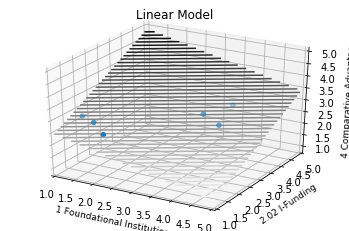




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 1 Foundational Institutions, 2.04 I-Demand
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9034882009953756, p-value: [[0.014796   0.00461447]]
Regression Coefficients: [-0.57197353  0.89280334]
Intercept: 2.013796759131127


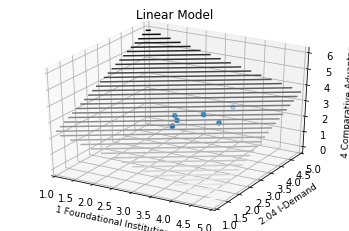




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.01 I-Human Capital, 2.03 I-Infrastructure
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8193705182262778, p-value: [[0.00335405 0.02322692]]
Regression Coefficients: [ 0.49829976 -0.325828  ]
Intercept: 1.4971920429393184


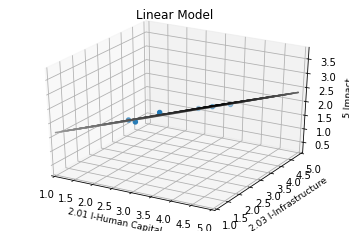




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.01 I-Human Capital, 2.05 I-Culture & Incentives
Predicted: 5 Impact
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9207897687672386, p-value: [[2.65906882e-05 4.05732704e-05]]
Regression Coefficients: [0.35862972 0.43941448]
Intercept: 0.3469286915107388


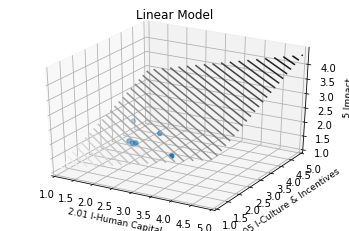




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.02 I-Funding, 1 Foundational Institutions
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.948857421438137, p-value: [[0.00217455 0.00049082]]
Regression Coefficients: [ 0.39246891 -0.6292434 ]
Intercept: 3.323386968946955


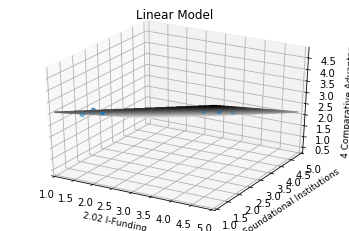




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.04 I-Demand, 1 Foundational Institutions
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8743609182517296, p-value: [[0.03125506 0.00856859]]
Regression Coefficients: [ 0.51736144 -0.85666311]
Intercept: 3.622728188256654


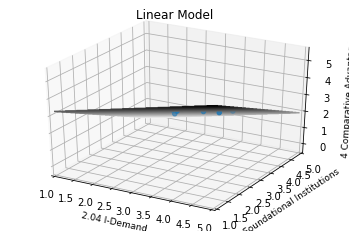




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.05 I-Culture & Incentives, 1 Foundational Institutions
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8768570972508145, p-value: [[0.03003925 0.00433588]]
Regression Coefficients: [ 0.10780147 -0.22947497]
Intercept: 3.0356104955441716


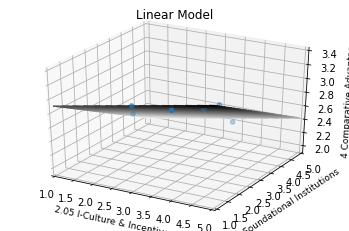




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.05 I-Culture & Incentives, 2.01 I-Human Capital
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8044104098362945, p-value: [[0.02019329 0.00055172]]
Regression Coefficients: [-0.15378054 -0.56369693]
Intercept: 4.305271534557415


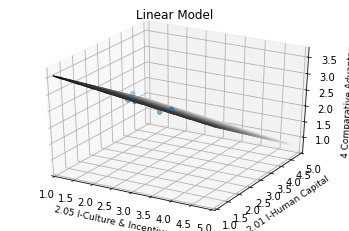




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 2.05 I-Culture & Incentives, 3.01 E-Human Capital
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8155081056707553, p-value: [[0.04675269 0.00810444]]
Regression Coefficients: [ 0.10982991 -0.23531627]
Intercept: 3.0205750153785753


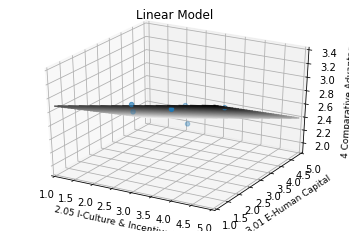




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.01 E-Human Capital, 2.02 I-Funding
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8811180405504193, p-value: [[0.00933919 0.00140927]]
Regression Coefficients: [-0.31499457  0.58705617]
Intercept: 2.189377714659


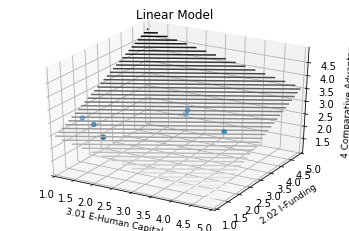




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.01 E-Human Capital, 2.03 I-Infrastructure
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8098278471485052, p-value: [[0.02516929 0.04466569]]
Regression Coefficients: [-0.3951867  -0.36480113]
Intercept: 5.363512809571261


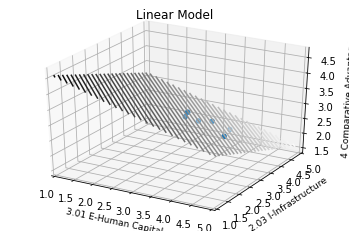




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: 3.01 E-Human Capital, 2.04 I-Demand
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8599935971542844, p-value: [[0.03188059 0.00079607]]
Regression Coefficients: [-0.32271692  1.0419281 ]
Intercept: 0.8375767719990768


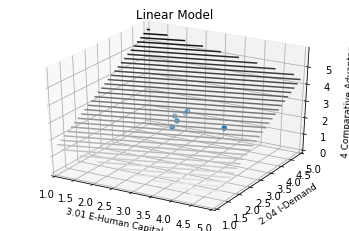

In [20]:
'''
3D linear model for predicting impact and comparative advantage from iEcosystem metrics
'''

for key1 in ieco_key_list:                         # for each pair (a,b) of distinct ieco metrics
    for key2 in ieco_key_list:
        if key1 != key2:
            for predict in ieco_key_predictors:    #or each predictor from Impact and C. Advantage
                
                #we make a numpy array from the predicted values and reshape it into 2 rows, 6 columns
                X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy()],axis=0)
                X=X.reshape(6,2)
                
                #make a numpy array of predictor
                y=ieco_df[predict].to_numpy()
                
                #make a Linear regression and obtains p-value using previously defined function
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                
                #if both p-values are small enough and the linear regression score is greater than 0.8
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Predictor metrics: '+key1+', '+key2)
                    print('Predicted: '+predict)
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) )
                    print('Intercept: ' + str(reg.intercept_))
                    plot_linear_model(reg,X,y,key1,key2,predict)
                    print('')
                    print('')
                    print('')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: avg strength, Camino más corto promedio
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9393750026349911, p-value: [[8.32950982e-05 1.14135421e-03]]
Regression Coefficients: [ 1.52093491 -0.74359955]
Intercept: 0.2189394194623664


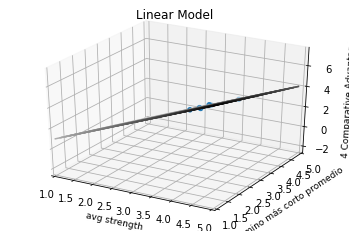




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Diámetro, avg strength
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9333420217897805, p-value: [[0.00248634 0.00488787]]
Regression Coefficients: [ 0.49273697 -0.39561523]
Intercept: 2.3544801242489104


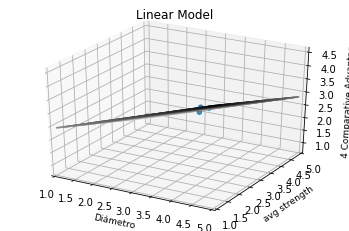




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Diámetro, Eccentricidad
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9691360868237916, p-value: [[0.00037699 0.00161184]]
Regression Coefficients: [ 0.38842425 -0.25257799]
Intercept: 2.0471636544888834


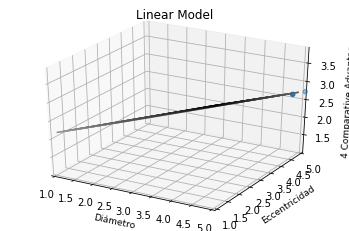




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Diámetro, Camino más corto promedio
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8691906367850932, p-value: [[0.01055552 0.01580778]]
Regression Coefficients: [ 0.4372618  -0.36763998]
Intercept: 2.541526420521553


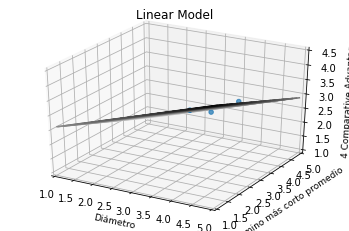




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Diámetro, Central Point Dominance
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8043377712798183, p-value: [[0.02429693 0.03252261]]
Regression Coefficients: [ 0.44977648 -0.39171703]
Intercept: 2.6201372778858287


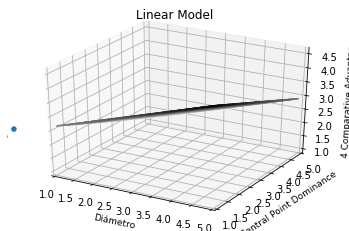




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Radio, Eccentricidad
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8121955178853725, p-value: [[0.01883018 0.01292411]]
Regression Coefficients: [ 0.2421795  -0.26156247]
Intercept: 2.906629246708233


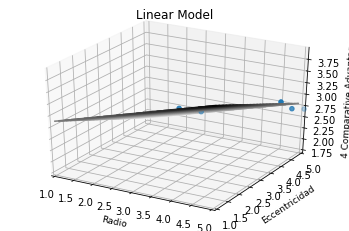




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predictor metrics: Radio, Diámetro
Predicted: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9860169369265395, p-value: [[1.19937308e-04 6.81998895e-05]]
Regression Coefficients: [ 0.27365385 -0.30644231]
Intercept: 3.000480769230769


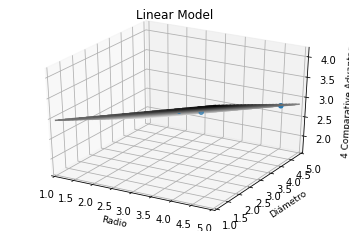

In [30]:
'''
3D linear models for predicting impact and comparative advantage using graph metrics
'''

grf_key_list=list(grf_df.keys())
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')                                   # list of all global metrics

ieco_key_predictors=['4 Comparative Advantage','5 Impact']    # our two predictors

for key1 in grf_key_list:
    for key2 in grf_key_list:                                 # for each pair (a,b) of distinct global metrics
        if key1 != key2:                                      
            for predict in ieco_key_predictors:               # and each predictor
                
                # we make a numpy array with the predicted values and reshape it into 2 rows, 6 columns
                X = np.concatenate([ieco_grf_df[key1].to_numpy(),ieco_grf_df[key2].to_numpy()],axis=0)
                X = X.reshape(6,2)
                
                # make a numpy array for our predictor
                y=ieco_grf_df[predict].to_numpy()
                
                #make linear regression with X,y data and obtain p-value
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                
                #if p-value is small enough and the regression score is greater than 0.8:
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Predictor metrics: '+key1+', '+key2)
                    print('Predicted: '+predict)
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) )
                    print('Intercept: ' + str(reg.intercept_))
                    plot_linear_model(reg,X,y,key1,key2,predict)
                    print('')
                    print('')
                    print('')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Eccentricidad
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9302262148521522, p-value: [[0.00081358 0.00222163]]
Regression Coefficients: [ 2.20786293 -1.62079637]
Intercept: 0.029330925065290447


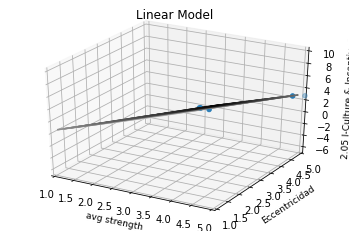




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9432260255893233, p-value: [[0.00109706 0.00122142]]
Regression Coefficients: [ 0.65147448 -0.61106662]
Intercept: 3.123232878608684


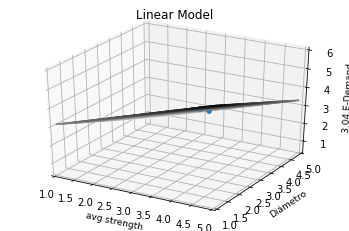




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Radio
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8655839372781196, p-value: [[0.03965733 0.00077866]]
Regression Coefficients: [ 0.17878093 -0.55464577]
Intercept: 4.20770999592363


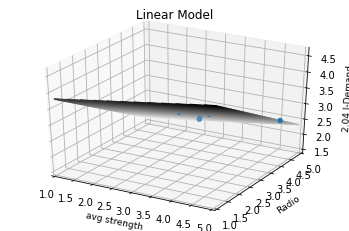




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Radio
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9731226329495432, p-value: [[4.38928253e-04 4.89870260e-05]]
Regression Coefficients: [ 0.35934101 -0.63726721]
Intercept: 4.205537651640551


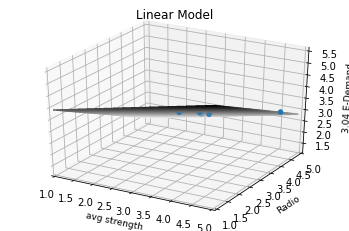




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Camino más corto promedio
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8380743663050417, p-value: [[0.00106521 0.00769456]]
Regression Coefficients: [ 1.17627357 -0.6595181 ]
Intercept: 1.2048822531184764


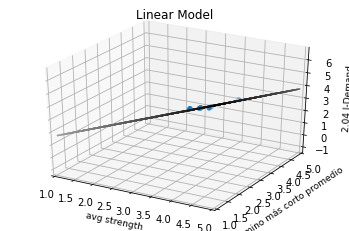




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Camino más corto promedio
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9393750026349911, p-value: [[8.32950982e-05 1.14135421e-03]]
Regression Coefficients: [ 1.52093491 -0.74359955]
Intercept: 0.2189394194623664


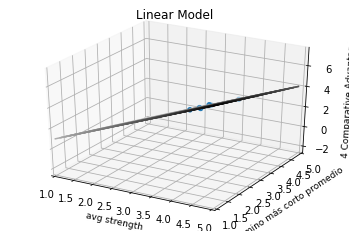




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Rich Club Coefficient
Predictor: 2.01 I-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8201518366777575, p-value: [[0.04318305 0.01338362]]
Regression Coefficients: [-0.0382179   0.02322675]
Intercept: 2.3477499044847


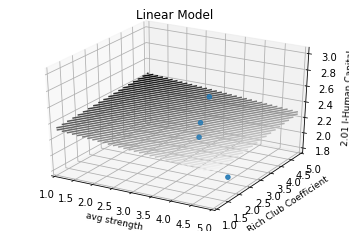




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Central Point Dominance
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9692733877302575, p-value: [[0.00025019 0.00027468]]
Regression Coefficients: [ 1.29178002 -1.2712979 ]
Intercept: 1.9884257269932157


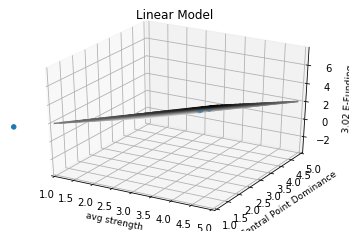




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: avg strength, Spectral radius
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9300097297053018, p-value: [[0.00210443 0.00186227]]
Regression Coefficients: [ 1.55133869 -1.60811804]
Intercept: 2.244618544623437


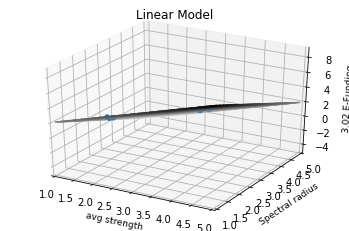




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Degree, Rich Club Coefficient
Predictor: 2.01 I-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8241096934417073, p-value: [[0.03969412 0.01272797]]
Regression Coefficients: [-0.03859753  0.02323973]
Intercept: 2.345203596213873


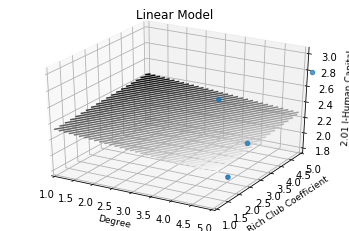




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eccentricidad, Rich Club Coefficient
Predictor: 2.01 I-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8120508669022174, p-value: [[0.04466176 0.01447711]]
Regression Coefficients: [-0.03702772  0.02293152]
Intercept: 2.3514612241264974


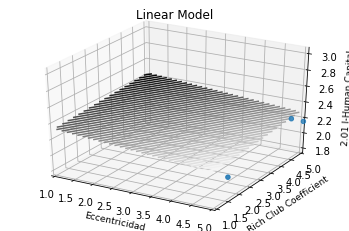




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8089347229538815, p-value: [[0.01531563 0.01461733]]
Regression Coefficients: [ 0.64091876 -0.62089525]
Intercept: 3.265621613979516


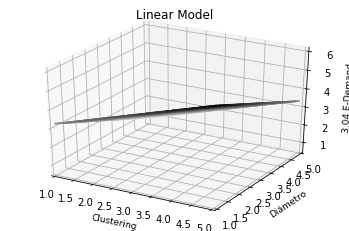




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Transitividad
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8634711137193123, p-value: [[0.00820992 0.00760117]]
Regression Coefficients: [-3.65688675  3.0473907 ]
Intercept: 2.1415305737000176


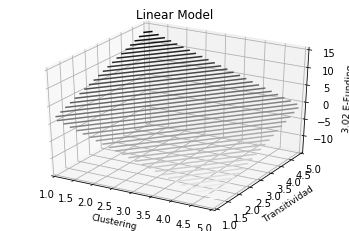




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Eficiencia Global
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8773249143431788, p-value: [[0.01107025 0.00594668]]
Regression Coefficients: [-3.81226672  4.62352543]
Intercept: 1.9488731222031204


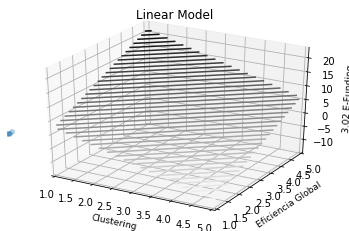




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Small Worldness
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8178052592355679, p-value: [[0.0116777  0.01511456]]
Regression Coefficients: [-1.00439728  0.86192008]
Intercept: 2.942306748285999


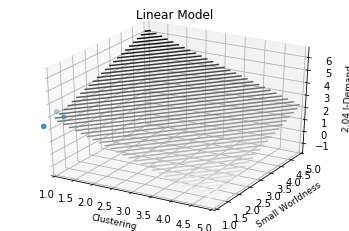




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Small Worldness
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9890897757000844, p-value: [[1.07554499e-04 5.36249076e-05]]
Regression Coefficients: [-3.6585244   4.04036285]
Intercept: 2.020861041194564


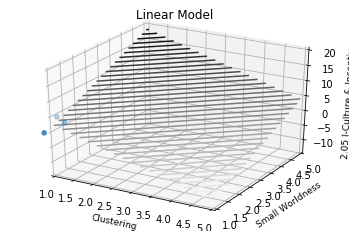




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Core Ratio
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9196826022639024, p-value: [[0.00210629 0.003147  ]]
Regression Coefficients: [-2.64521461  2.27342213]
Intercept: 2.974568130148397


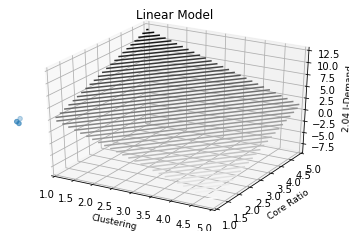




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Clustering, Core Ratio
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8385126288809474, p-value: [[0.01396195 0.01032225]]
Regression Coefficients: [-2.65868802  2.78021428]
Intercept: 2.04798048486483


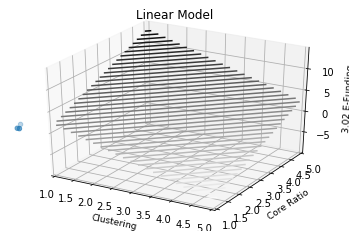




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, avg strength
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8923461574137455, p-value: [[0.00754016 0.01534162]]
Regression Coefficients: [ 1.12658919 -0.88431228]
Intercept: 2.041896797071316


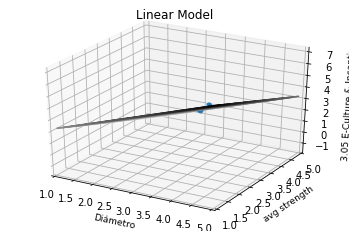




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, avg strength
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9333420217897805, p-value: [[0.00248634 0.00488787]]
Regression Coefficients: [ 0.49273697 -0.39561523]
Intercept: 2.3544801242489104


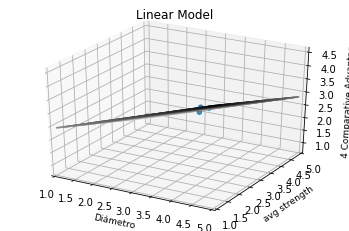




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Eccentricidad
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9188491869590036, p-value: [[0.00351823 0.00234569]]
Regression Coefficients: [ 0.38261154 -0.40493138]
Intercept: 2.370850255184816


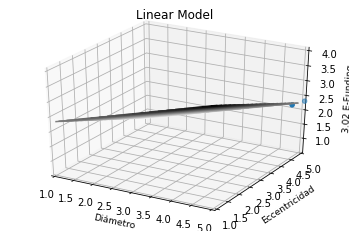




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Eccentricidad
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9691360868237916, p-value: [[0.00037699 0.00161184]]
Regression Coefficients: [ 0.38842425 -0.25257799]
Intercept: 2.0471636544888834


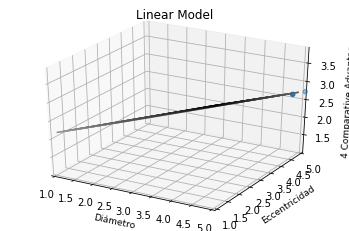




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Camino más corto promedio
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9846067855531724, p-value: [[1.03701691e-04 7.44997640e-05]]
Regression Coefficients: [ 0.55676912 -0.57331548]
Intercept: 2.369683389683175


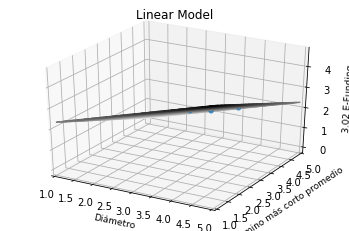




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Camino más corto promedio
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8691906367850932, p-value: [[0.01055552 0.01580778]]
Regression Coefficients: [ 0.4372618  -0.36763998]
Intercept: 2.541526420521553


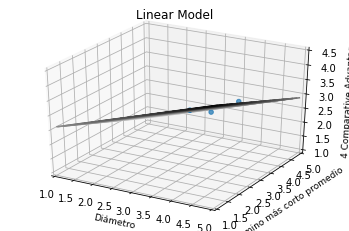




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Small Worldness
Predictor: 2.02 I-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8390637999005457, p-value: [[0.02334385 0.03340107]]
Regression Coefficients: [-0.4636508   0.39464788]
Intercept: 1.8211535994517


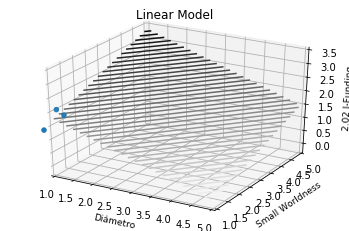




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Central Point Dominance
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8515342478596516, p-value: [[0.00834557 0.00842326]]
Regression Coefficients: [ 0.58842059 -0.56120833]
Intercept: 2.0748176866255714


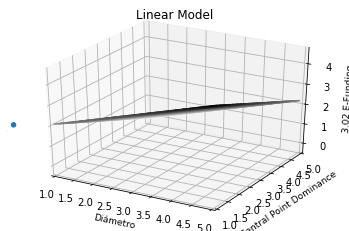




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Diámetro, Central Point Dominance
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8043377712798183, p-value: [[0.02429693 0.03252261]]
Regression Coefficients: [ 0.44977648 -0.39171703]
Intercept: 2.6201372778858287


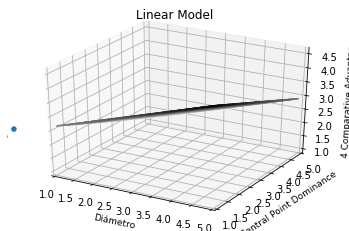




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, avg strength
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8082960123946901, p-value: [[0.03973925 0.00200752]]
Regression Coefficients: [ 0.25621325 -0.62023792]
Intercept: 3.388761334249817


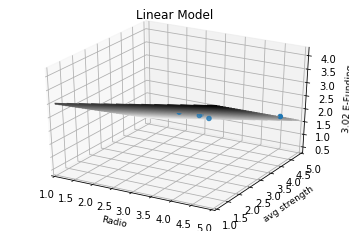




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, weight
Predictor: 2.02 I-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8486857758871098, p-value: [[0.01168158 0.036645  ]]
Regression Coefficients: [-0.27662304  0.18866807]
Intercept: 1.822752046141992


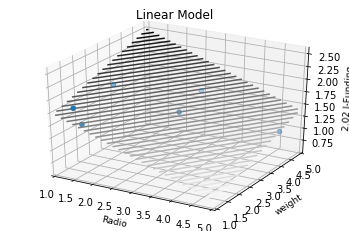




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Degree
Predictor: 2.03 I-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9078086151967691, p-value: [[0.0029362  0.00705201]]
Regression Coefficients: [0.1737007  0.11686398]
Intercept: 2.3538699469406783


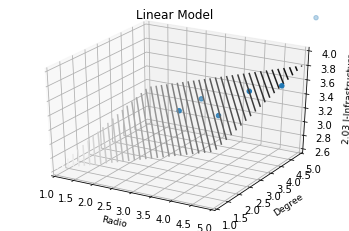




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Degree
Predictor: 3.03 E-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.975666228105808, p-value: [[0.00037249 0.00039196]]
Regression Coefficients: [0.1407046  0.11890572]
Intercept: 2.815606809417363


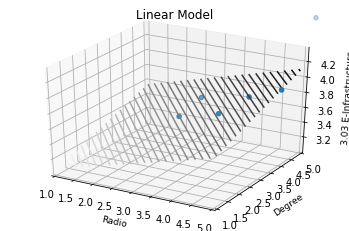




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Eccentricidad
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8121955178853725, p-value: [[0.01883018 0.01292411]]
Regression Coefficients: [ 0.2421795  -0.26156247]
Intercept: 2.906629246708233


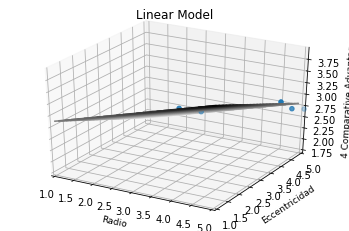




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Clustering
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.864944311467463, p-value: [[0.01444126 0.03550706]]
Regression Coefficients: [ 0.53268954 -0.41167809]
Intercept: 3.0298827390522325


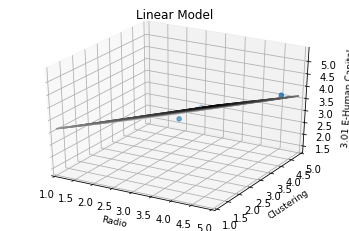




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Clustering
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8570179743043991, p-value: [[0.01167947 0.02226137]]
Regression Coefficients: [ 0.73928111 -0.62343147]
Intercept: 2.9006112949010925


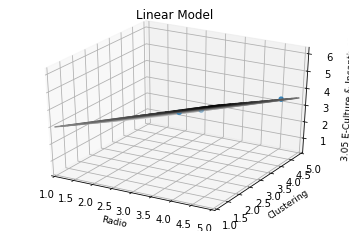




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Diámetro
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9105426802346411, p-value: [[0.00358117 0.00283759]]
Regression Coefficients: [ 0.6978312 -0.7213515]
Intercept: 3.361469017094017


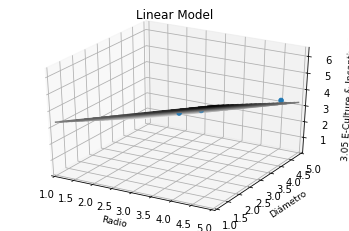




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Diámetro
Predictor: 4 Comparative Advantage
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9860169369265395, p-value: [[1.19937308e-04 6.81998895e-05]]
Regression Coefficients: [ 0.27365385 -0.30644231]
Intercept: 3.000480769230769


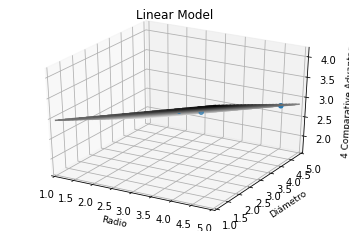




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Camino más corto promedio
Predictor: 3.02 E-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8564063216254714, p-value: [[0.03813989 0.00197343]]
Regression Coefficients: [ 0.21154015 -0.48527291]
Intercept: 3.1525824758636563


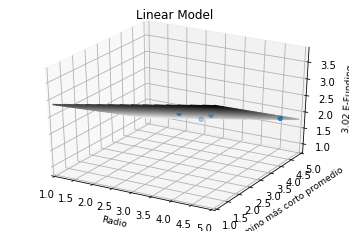




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Transitividad
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8566120790957027, p-value: [[0.01640341 0.039332  ]]
Regression Coefficients: [ 0.52732656 -0.4090395 ]
Intercept: 3.040886680588173


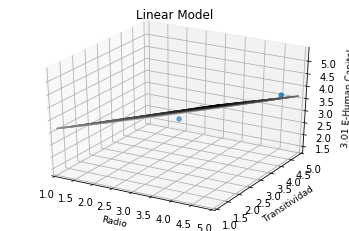




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Transitividad
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.862577893968534, p-value: [[0.01071706 0.02002052]]
Regression Coefficients: [ 0.7416938  -0.63021941]
Intercept: 2.9165854345329345


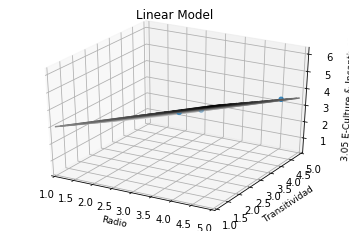




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Eficiencia Global
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8752236012377511, p-value: [[0.01236813 0.03282342]]
Regression Coefficients: [ 0.53709772 -0.40703063]
Intercept: 2.997035448359551


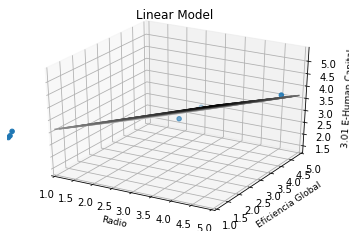




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Eficiencia Global
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8770439762493971, p-value: [[0.00848354 0.01698045]]
Regression Coefficients: [ 0.753316  -0.6296199]
Intercept: 2.868715356297577


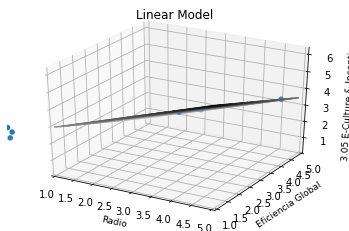




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Small Worldness
Predictor: 2.02 I-Funding
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8385289264168377, p-value: [[0.0172699  0.04724313]]
Regression Coefficients: [-0.31828716  0.23387655]
Intercept: 1.8235454699253832


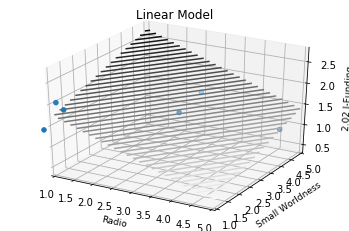




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Core Ratio
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8592737451402785, p-value: [[0.016111   0.04344492]]
Regression Coefficients: [ 0.52454464 -0.39100702]
Intercept: 2.986730989357662


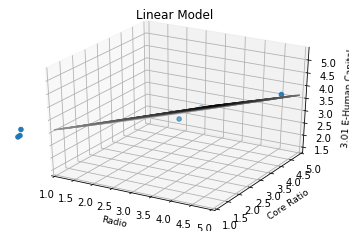




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Core Ratio
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8592165423926489, p-value: [[0.01124003 0.02239418]]
Regression Coefficients: [ 0.73940565 -0.6149763 ]
Intercept: 2.86765007898212


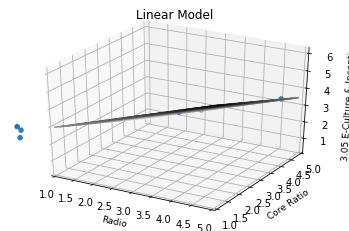




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Central Point Dominance
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9094230541031643, p-value: [[0.00608684 0.01865677]]
Regression Coefficients: [ 0.54401771 -0.40344786]
Intercept: 2.9559675754929713


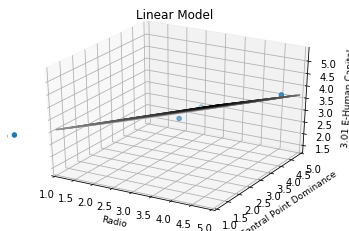




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Central Point Dominance
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.823966640718566, p-value: [[0.01741652 0.03810128]]
Regression Coefficients: [ 0.70862398 -0.56749746]
Intercept: 2.806062660462471


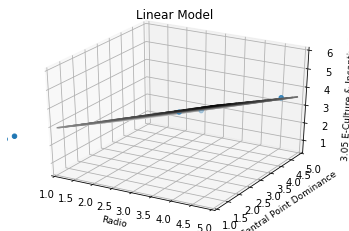




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Spectral radius
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9367898504494997, p-value: [[0.00339062 0.02812796]]
Regression Coefficients: [ 0.54770186 -0.30189855]
Intercept: 2.5755631858183206


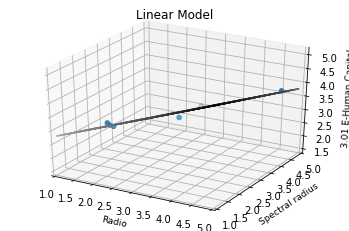




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Radio, Spectral radius
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8736293679218529, p-value: [[0.00906352 0.03117822]]
Regression Coefficients: [ 0.74649284 -0.52317306]
Intercept: 2.4983573074879644


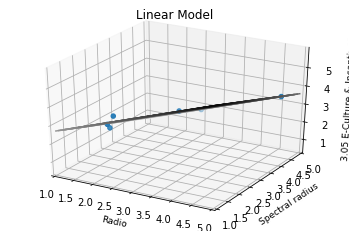




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Camino más corto promedio, Degree
Predictor: 2.03 I-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8434757746449724, p-value: [[0.00447211 0.02243361]]
Regression Coefficients: [0.23247741 0.11902332]
Intercept: 2.1381174846140723


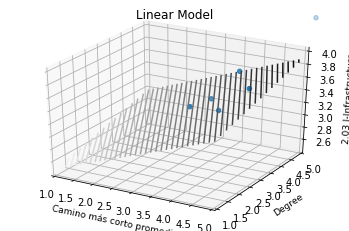




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Camino más corto promedio, Degree
Predictor: 3.03 E-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9266096510507953, p-value: [[0.00181191 0.00435506]]
Regression Coefficients: [0.18641599 0.12029112]
Intercept: 2.648627038853512


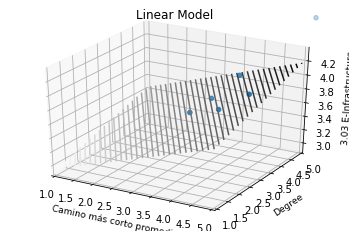




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Camino más corto promedio, Eccentricidad
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9123469379428358, p-value: [[0.00214909 0.00394578]]
Regression Coefficients: [ 1.91191137 -1.51279181]
Intercept: 1.0466003459133453


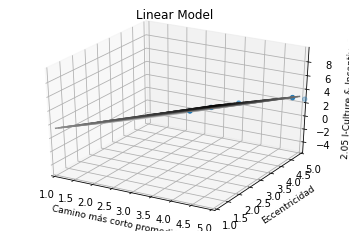




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Camino más corto promedio, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9166239433342188, p-value: [[0.00281746 0.00225223]]
Regression Coefficients: [ 0.58153703 -0.58478917]
Intercept: 3.4267875258815295


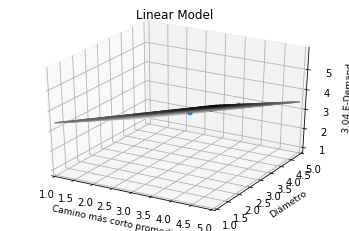




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Camino más corto promedio, Rich Club Coefficient
Predictor: 2.01 I-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8247477850911543, p-value: [[0.04396652 0.01293748]]
Regression Coefficients: [-0.03756129  0.02319812]
Intercept: 2.3397348547546764


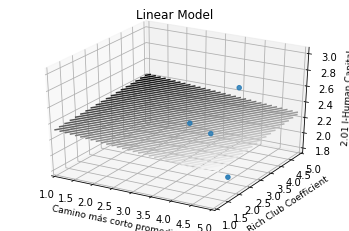




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Transitividad, Clustering
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9268942665982967, p-value: [[0.00060396 0.00283218]]
Regression Coefficients: [-4.48978212  2.43730157]
Intercept: 3.092410788331625


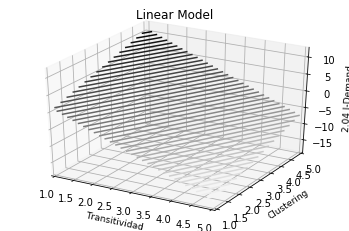




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Transitividad, Small Worldness
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8388186544897704, p-value: [[0.00972403 0.01156219]]
Regression Coefficients: [-0.98390208  0.8637008 ]
Intercept: 2.9197250421529626


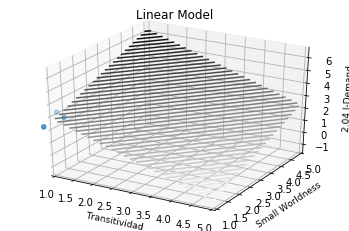




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Transitividad, Small Worldness
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9996648693094287, p-value: [[1.09808720e-07 4.99565633e-08]]
Regression Coefficients: [-3.56729543  4.00941158]
Intercept: 1.9605222987927946


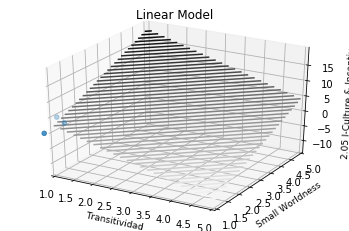




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Transitividad, Core Ratio
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8833301883900744, p-value: [[0.00513771 0.00614268]]
Regression Coefficients: [-2.30440631  2.0674474 ]
Intercept: 2.913974459620795


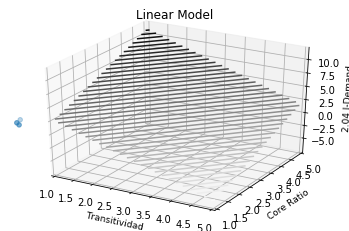




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, avg strength
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8173595574715609, p-value: [[0.01554852 0.01750136]]
Regression Coefficients: [ 5.51139508 -5.34349845]
Intercept: 1.9600853872464135


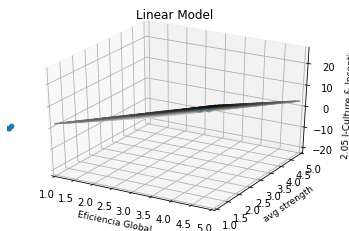




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Clustering
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8610110346553703, p-value: [[0.01654117 0.00797756]]
Regression Coefficients: [-3.00064831  3.77316693]
Intercept: 2.729779781253426


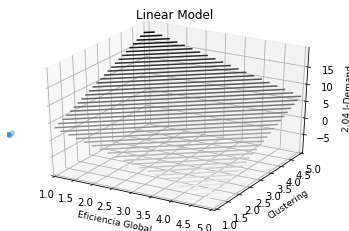




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Clustering
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9894705102839328, p-value: [[3.54584486e-05 5.12828622e-05]]
Regression Coefficients: [-18.04275933  16.70796565]
Intercept: 2.7418705824757943


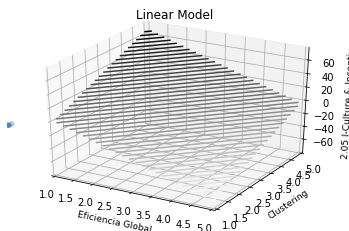




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8534634104877434, p-value: [[0.00881453 0.00851309]]
Regression Coefficients: [ 0.66237832 -0.63925197]
Intercept: 3.250401707687108


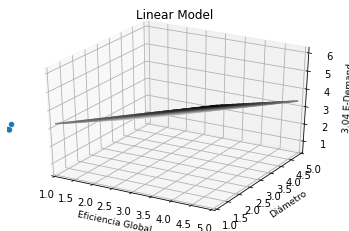




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Transitividad
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9162572755232081, p-value: [[0.00269346 0.00292846]]
Regression Coefficients: [-13.46741688  13.01462921]
Intercept: 2.3987577709950774


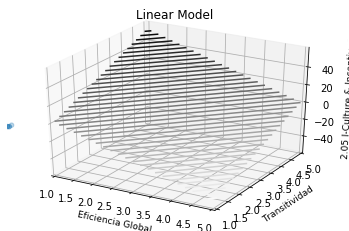




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Small Worldness
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9699603697385217, p-value: [[0.00077145 0.00040476]]
Regression Coefficients: [-3.6844818   4.07029861]
Intercept: 2.017785790915267


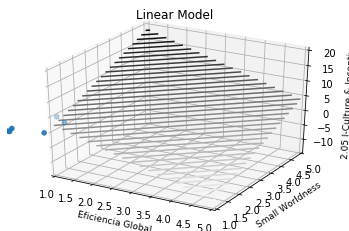




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Core Ratio
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8867604675972469, p-value: [[0.00661965 0.00506441]]
Regression Coefficients: [-10.92803991  11.60044021]
Intercept: 2.088212661540305


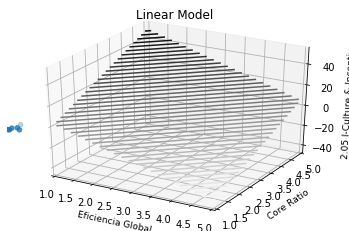




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Eficiencia Global, Central Point Dominance
Predictor: 3.03 E-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8529018528387778, p-value: [[0.01630904 0.00438809]]
Regression Coefficients: [ 1.26367249 -2.35739063]
Intercept: 4.067569450482249


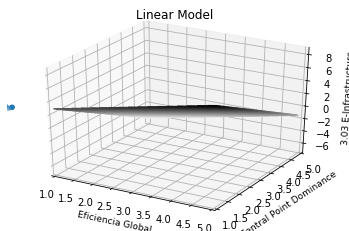




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, avg strength
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9278570238878204, p-value: [[0.00039039 0.00238253]]
Regression Coefficients: [ 0.09719978 -0.02543566]
Intercept: 2.7748130487928386


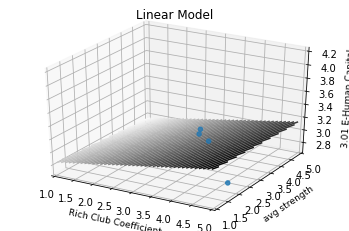




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, weight
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8725112043893425, p-value: [[0.0024403  0.00945553]]
Regression Coefficients: [ 0.0824678  -0.02334219]
Intercept: 2.931386406253421


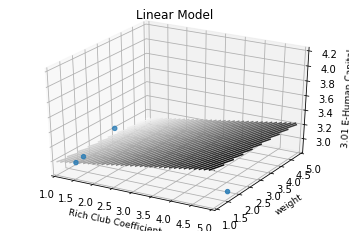




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Degree
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.89858100300931, p-value: [[0.00072051 0.00477673]]
Regression Coefficients: [ 0.09763875 -0.02489379]
Intercept: 2.7524390489551847


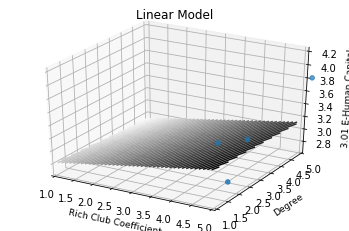




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Eccentricidad
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9497674690928952, p-value: [[9.66196480e-05 8.99419581e-04]]
Regression Coefficients: [ 0.11101249 -0.02712826]
Intercept: 2.6072827953467486


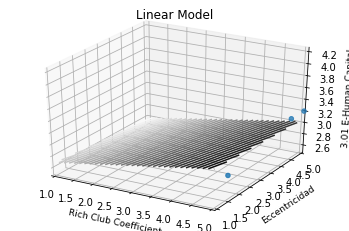




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Eccentricidad
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8421826559768368, p-value: [[0.00103418 0.01895877]]
Regression Coefficients: [ 0.13570723 -0.0262159 ]
Intercept: 2.2327133974982676


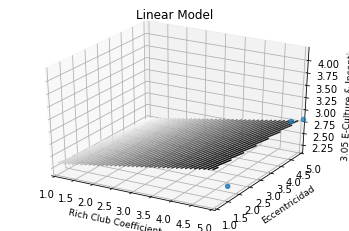




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Clustering
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8544618286396557, p-value: [[0.00424346 0.01328386]]
Regression Coefficients: [ 0.076256  -0.0226271]
Intercept: 2.998451457142743


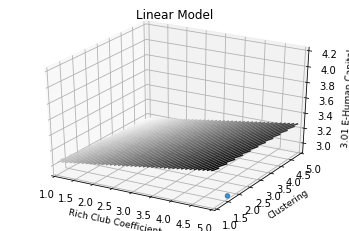




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Diámetro
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9137765658108575, p-value: [[0.00018648 0.00224844]]
Regression Coefficients: [ 0.11816269 -0.02759638]
Intercept: 2.4875132461853493


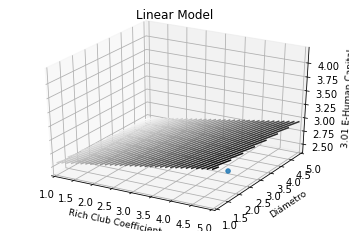




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Diámetro
Predictor: 3.05 E-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.924818114331065, p-value: [[0.00012302 0.0036199 ]]
Regression Coefficients: [ 0.15539848 -0.02871891]
Intercept: 2.001395442697402


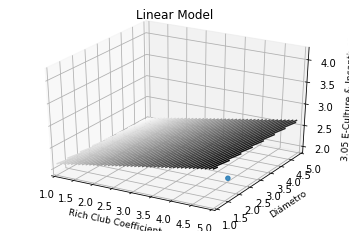




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Radio
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.880190919863854, p-value: [[0.00109064 0.00649673]]
Regression Coefficients: [ 0.09500576 -0.02480641]
Intercept: 2.7756851471255937


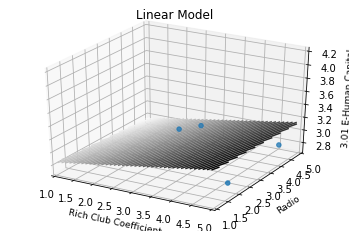




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Camino más corto promedio
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9226150584250875, p-value: [[0.00046157 0.00276423]]
Regression Coefficients: [ 0.09659689 -0.02535723]
Intercept: 2.780360469783632


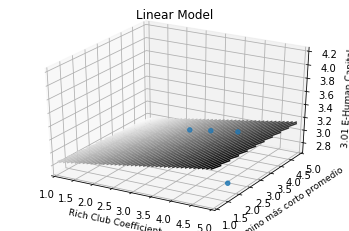




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Transitividad
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8532791372538879, p-value: [[0.00435734 0.01354602]]
Regression Coefficients: [ 0.07601381 -0.0225883 ]
Intercept: 3.0008252295824933


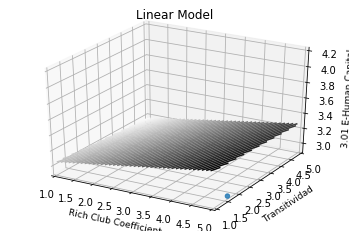




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Eficiencia Global
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8590975740417901, p-value: [[0.003802   0.01229237]]
Regression Coefficients: [ 0.07729647 -0.02277555]
Intercept: 2.9880012781956324


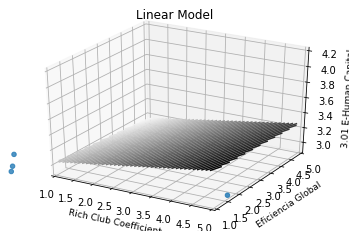




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Small Worldness
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8679996414530671, p-value: [[0.00284636 0.01027956]]
Regression Coefficients: [ 0.08069191 -0.02320039]
Intercept: 2.9512755333701057


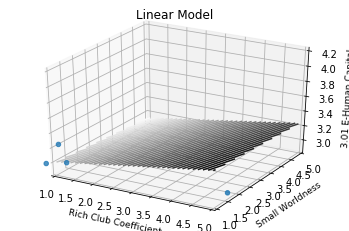




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Core Ratio
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8603009577364396, p-value: [[0.00363347 0.01198373]]
Regression Coefficients: [ 0.07789719 -0.02284531]
Intercept: 2.981382300823723


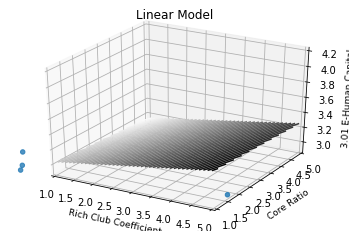




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Central Point Dominance
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8657870284297156, p-value: [[0.00339811 0.01112203]]
Regression Coefficients: [ 0.07775695 -0.02288274]
Intercept: 2.984943130971327


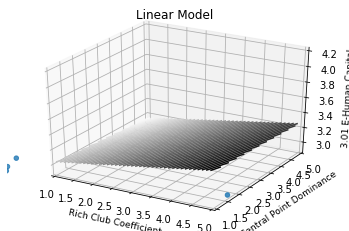




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Rich Club Coefficient, Spectral radius
Predictor: 3.01 E-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8942780745639923, p-value: [[0.00139696 0.0060702 ]]
Regression Coefficients: [ 0.08656358 -0.02404614]
Intercept: 2.8914002784985926


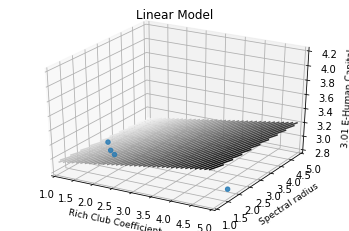




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Core Ratio, Clustering
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8360112520993394, p-value: [[0.01684346 0.01095576]]
Regression Coefficients: [-2.10929716  2.2931189 ]
Intercept: 2.810576079390134


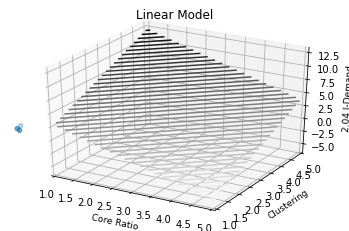




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Core Ratio, Transitividad
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8326639121613373, p-value: [[0.02071516 0.01085751]]
Regression Coefficients: [-1.84125601  2.10562459]
Intercept: 2.774955191157563


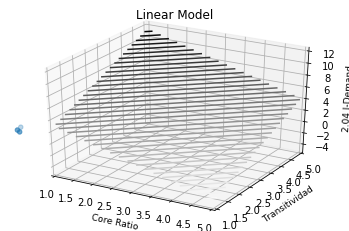




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Core Ratio, Small Worldness
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8631384856880238, p-value: [[0.00511386 0.00872316]]
Regression Coefficients: [-1.06256059  0.85245262]
Intercept: 3.010128471975488


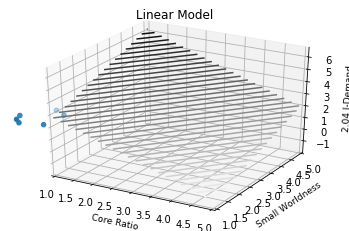




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Core Ratio, Small Worldness
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9990863151335958, p-value: [[1.00015535e-06 3.60879175e-07]]
Regression Coefficients: [-3.3139235  3.9863931]
Intercept: 1.727708260166994


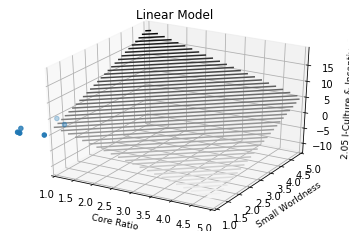




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Central Point Dominance, weight
Predictor: 3.03 E-Infrastructure
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8074717086728822, p-value: [[0.03653312 0.01762615]]
Regression Coefficients: [-0.40717174  0.3928563 ]
Intercept: 3.832644292501125


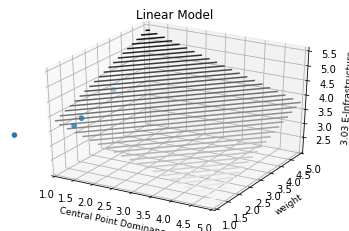




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Central Point Dominance, Eccentricidad
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.880126987391935, p-value: [[0.00505823 0.00689314]]
Regression Coefficients: [ 1.84557242 -1.59154246]
Intercept: 1.7852016878134243


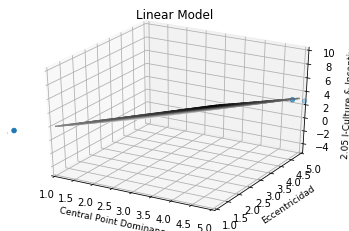




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Central Point Dominance, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.985252820699359, p-value: [[7.69758450e-05 7.85456367e-05]]
Regression Coefficients: [ 0.67088027 -0.63827648]
Intercept: 3.185268439387885


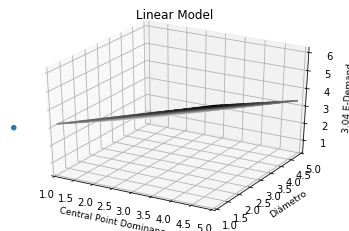




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Central Point Dominance, Radio
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.853460617235015, p-value: [[0.00923978 0.00837939]]
Regression Coefficients: [ 0.36841623 -0.38904743]
Intercept: 3.2481158329799076


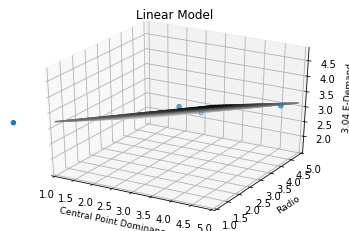




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, avg strength
Predictor: 2.04 I-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.80291730269615, p-value: [[0.01946897 0.01626518]]
Regression Coefficients: [ 1.15733119 -1.22646416]
Intercept: 3.0572078411111647


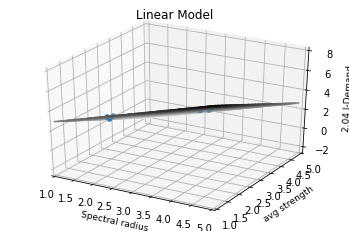




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, avg strength
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9438484158432724, p-value: [[0.00130849 0.00162798]]
Regression Coefficients: [ 5.63350425 -5.33654317]
Intercept: 1.5185422958482646


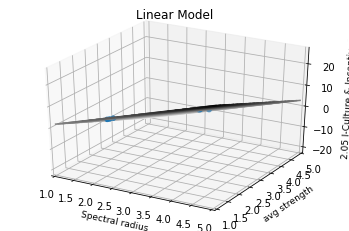




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, avg strength
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8790364502002165, p-value: [[0.00641038 0.00567872]]
Regression Coefficients: [ 1.59003289 -1.65037711]
Intercept: 3.3745117402637894


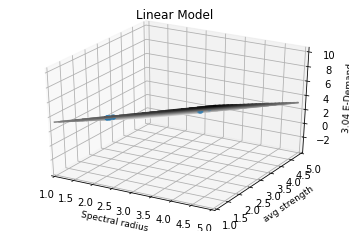




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, Eccentricidad
Predictor: 2.05 I-Culture & Incentives
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8868825074415473, p-value: [[0.00392832 0.00621678]]
Regression Coefficients: [ 1.98766226 -1.65468711]
Intercept: 1.3996532228623946


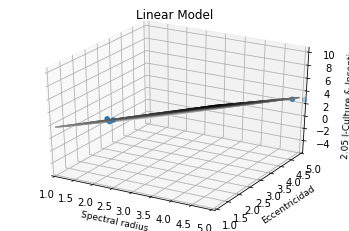




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, Diámetro
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.9626786624969259, p-value: [[0.00052231 0.00052648]]
Regression Coefficients: [ 0.69543773 -0.66518981]
Intercept: 3.2098045790479084


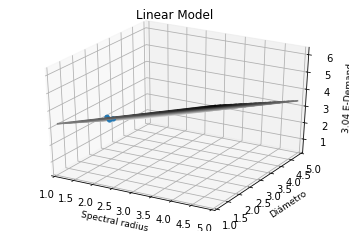




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, Radio
Predictor: 3.04 E-Demand
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8653066169843439, p-value: [[0.00869181 0.00477572]]
Regression Coefficients: [ 0.36881196 -0.44457638]
Intercept: 3.4392478338019057


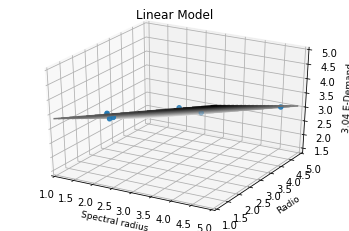




- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Predicted metrics: Spectral radius, Rich Club Coefficient
Predictor: 2.01 I-Human Capital
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Regression Score: 0.8269086802561233, p-value: [[0.04836997 0.01301732]]
Regression Coefficients: [-0.03693087  0.023156  ]
Intercept: 2.327701668040489


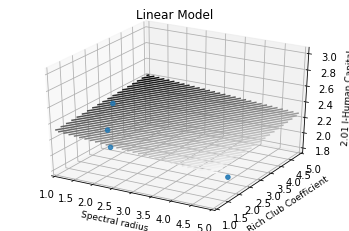

In [31]:
'''
3D linear models for predicting iEcosystem metrics using graph metrics
'''

grf_key_list=list(grf_df.keys())
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')                                   # list of all global metrics

ieco_key_list=list(ieco_df.keys())
ieco_key_list.remove('Unnamed: 0')                            #iEco metrics predictors/to be predicted

for key1 in grf_key_list:
    for key2 in grf_key_list:                                 # for each pair (a,b) of distinct global metrics
        if key1 != key2:                                      
            for predict in ieco_key_list:               # and each predictor
                
                # we make a numpy array with the predicted values and reshape it into 2 rows, 6 columns
                X = np.concatenate([ieco_grf_df[key1].to_numpy(),ieco_grf_df[key2].to_numpy()],axis=0)
                X = X.reshape(6,2)
                
                # make a numpy array for our predictor
                y=ieco_grf_df[predict].to_numpy()
                
                #make linear regression with X,y data and obtain p-value
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                
                #if p-value is small enough and the regression score is greater than 0.8:
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Predicted metrics: '+key1+', '+key2)
                    print('Predictor: '+predict)
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) )
                    print('Intercept: ' + str(reg.intercept_))
                    plot_linear_model(reg,X,y,key1,key2,predict)
                    print('')
                    print('')
                    print('')
                